# For the whole structure of files please read EDA _2_README_Introduction_1.ipynb
## Graphical exploration for hypotheses 3: The number of floors should have a negative impact on the price of the house: the more floors relative to the living area, the lower the selling price should be
  * Additional variables are created or renamed and some graphical explorations are performed

##### Getting data

In [105]:
# definitions
with open("0_definitions.py") as file:
    exec(file.read())

In [ ]:
df_eda = pd.read_csv("eda5.csv",)
df_eda = df_eda.drop(df_eda.columns[0], axis=1)
df_eda.head() 

##### Floors adusted to living area

In [ ]:
# Ratio floors to living area
# Rescaling from footage square to meter square
df_eda['floors_livmeter']=(df_eda["floors"]/(df_eda["sqft_living"]*0.092903)) * 100
df_eda['floors_livmeter'].describe()
# df_eda.head()

##### Some extra variables for EDA

## Checking for  correlaiton of price and number of 1) floors and 2) adjusted ratio floors/living square

Text(95.7222222222222, 0.5, 'Features')

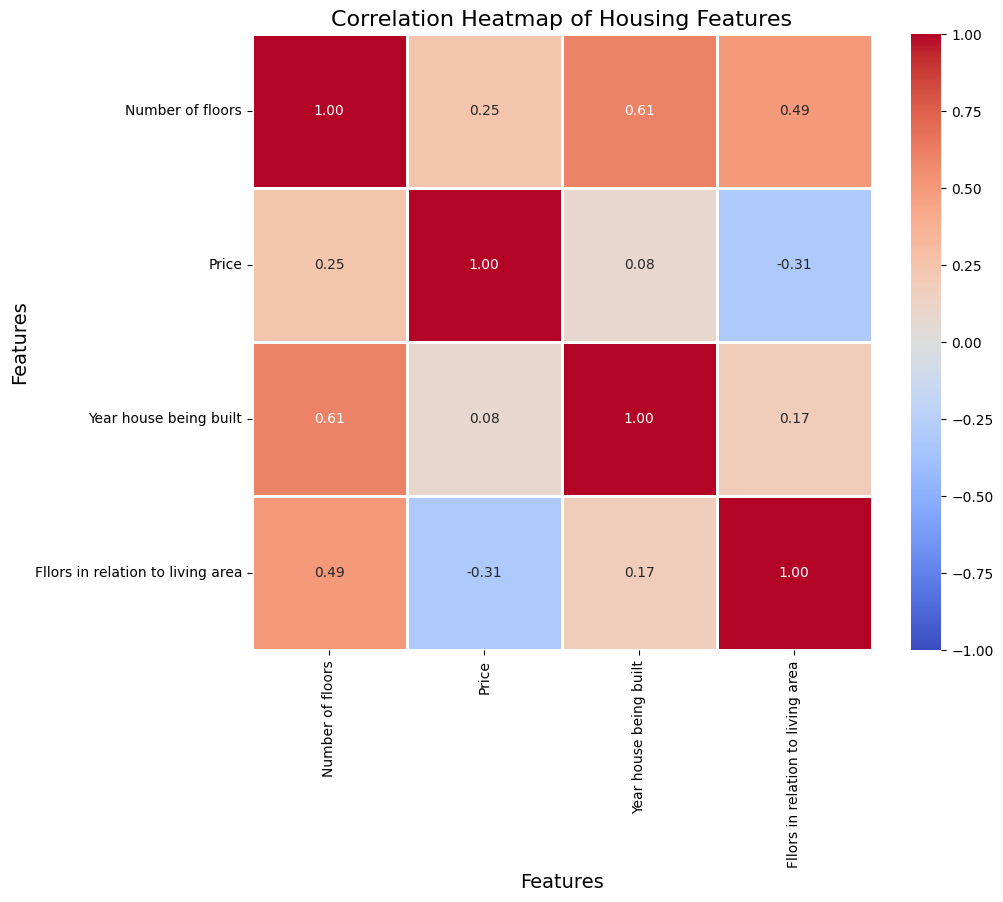

In [108]:
new_column_names = {
    'floors': 'Number of floors',
    'price': 'Price',
    'yr_built': 'Year house being built',
    'floors_livmeter': 'Fllors in relation to living area',
    
}

# Rename columns in the DataFrame
df_eda.rename(columns=new_column_names, inplace=True)

# Define the list of columns for correlation
num_question = list(new_column_names.values())  # Use the new column names

# Plotting the heatmap
plt.figure(figsize=(10, 8), dpi=100)
heatmap = sns.heatmap(
    data=df_eda[num_question].corr(),  # Compute correlation matrix for specified columns
    cmap='coolwarm',                  # Color map
    linecolor='white',                # Color of lines that separate cells
    linewidth=1,                      # Width of lines that separate cells
    annot=True,                       # Annotate cells with correlation coefficients
    vmin=-1,                          # Minimum value of the color scale
    vmax=1,                           # Maximum value of the color scale
    fmt='.2f'                         # Format annotations to 2 decimal places
)

# Adding labels and title
plt.title('Correlation Heatmap of Housing Features', fontsize=16)  # Title with larger font size
plt.xlabel('Features', fontsize=14)            # X-axis label with larger font size
plt.ylabel('Features', fontsize=14)            # Y-axis label with larger font size

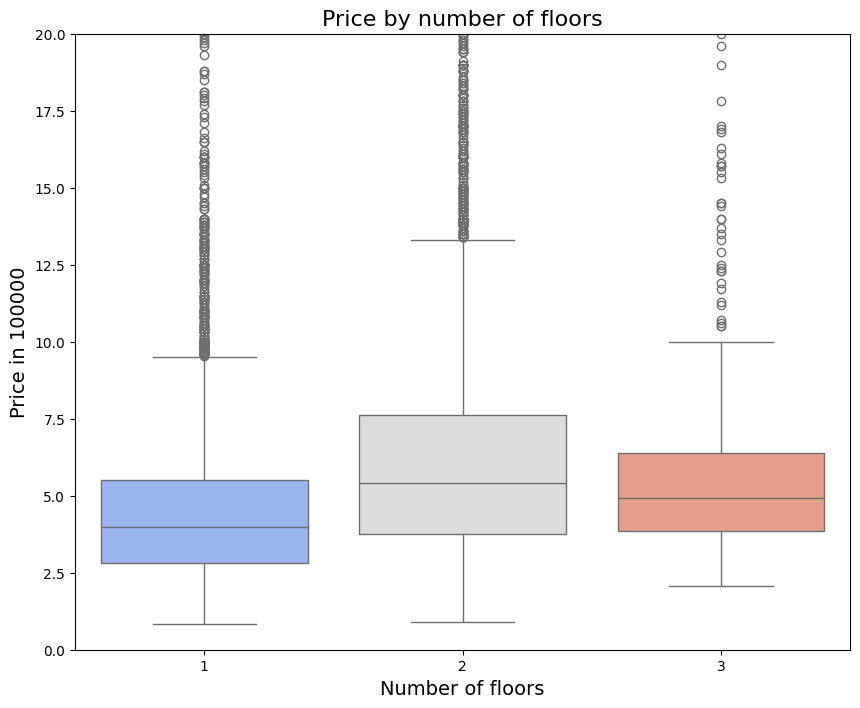

In [109]:
plt.figure(figsize=(10, 8), dpi=100)
sns.boxplot(
    x='Number of floors',  # Binned categories
    y='Price',                # Variable to plot
    data=df_eda,              # Data source
    palette='coolwarm'        # Color palette for the boxplot
)

# Adding labels and title
plt.title('Price by number of floors', fontsize=16)  # Title with larger font size
plt.xlabel('Number of floors', fontsize=14)              # X-axis label
plt.ylabel('Price in 100000', fontsize=14)                                       # Y-axis label

plt.ylim(0, 20) 
plt.show()  # Display the boxplot

In [ ]:
sns.scatterplot(data=df_eda, x='Year house being built', y='Price', 
                    hue='Number of floors', palette='dark');

##### Taking living area into account: similar to EDA_4_hyp_1

In [111]:
# Define bins and labels
bins = [0, 0.15, 0.56, 0.75, 1, float('inf')]
labels = ['Very few', 'Few', 'Middle', 'Some more' , 'Many']
# Apply pd.cut to bin the data
df_eda['floors_100'] = pd.cut(df_eda['Fllors in relation to living area'], bins=bins, labels=labels)


##### Price destribution by floors per 100 sqm  

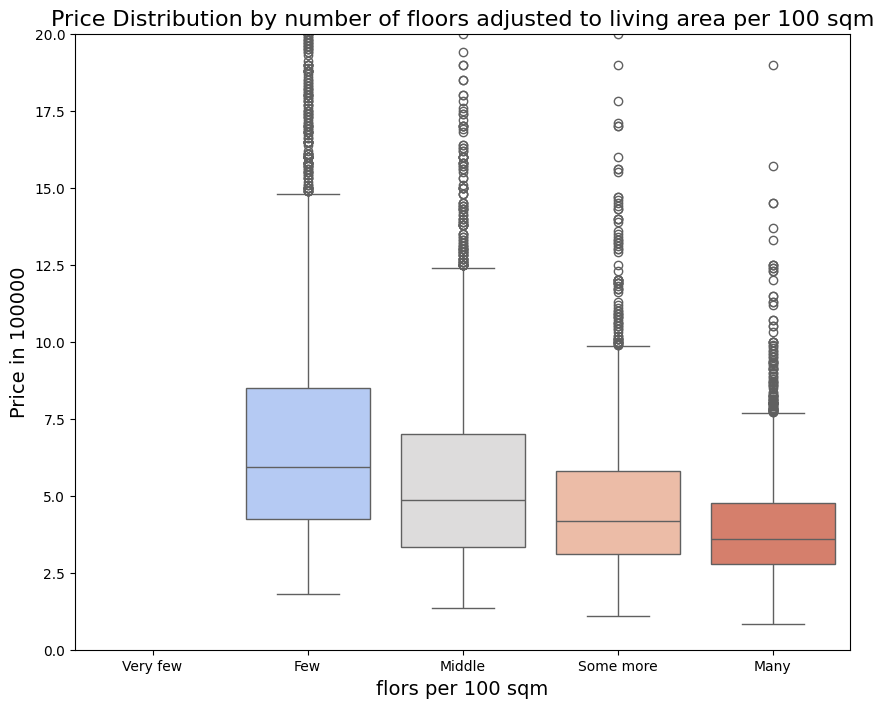

In [112]:
plt.figure(figsize=(10, 8), dpi=100)
sns.boxplot(
    x='floors_100',  # Binned categories
    y='Price',                # Variable to plot
    data=df_eda,              # Data source
    palette='coolwarm'        # Color palette for the boxplot
)

# Adding labels and title
plt.title('Price Distribution by number of floors adjusted to living area per 100 sqm', fontsize=16)  # Title with larger font size
plt.xlabel('flors per 100 sqm', fontsize=14)              # X-axis label
plt.ylabel('Price in 100000', fontsize=14)                                       # Y-axis label

plt.ylim(0, 20) 
plt.show()  # Display the boxplot